In [1]:
import sys
dataDir = '.'
sys.path.insert(0, '%s/PythonHelperTools/vqaTools' %(dataDir))
from vqa import VQA
from vqaEvaluation.vqaEval import VQAEval
import matplotlib
% matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io
import json
import random
import os

In [2]:
# set up file names and paths
taskType    ='OpenEnded'
dataType    ='mscoco'  # 'mscoco' for real and 'abstract_v002' for abstract
dataSubType ='val2014'
annFile     ='%s/Val/%s_%s_annotations.json'%(dataDir, dataType, dataSubType)
quesFile    ='%s/Val/%s_%s_%s_questions.json'%(dataDir, taskType, dataType, dataSubType)
imgDir      ='%s/val2014/' %(dataDir)
resultType  ='results.json'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType']

In [3]:
[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['results.json' for fileType in fileTypes]

In [4]:
# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

loading VQA annotations and questions into memory...
0:00:02.603697
creating index...
index created!
Loading and preparing results...     
DONE (t=0.33s)
creating index...
index created!


In [5]:
# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

In [6]:
# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
vqaEval.evaluate()

computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy




Overall Accuracy is: 42.46

Per Question Type Accuracy is the following:
what is in the : 18.81
is : 71.37
is the person : 67.54
how many people are in : 33.65
what color is the : 36.46
where are the : 14.85
what is the woman : 14.93
is it : 75.71
what room is : 41.57
is there a : 85.01
what color : 19.54
what color are the : 36.34
what brand : 22.02
is this an : 75.48
is he : 74.93
are : 67.38
is the woman : 70.99
are there : 81.11
is the man : 73.13
are these : 67.56
none of the above : 41.32
what does the : 7.85
which : 15.59
how many : 33.12
do : 69.64
why : 13.09
has : 73.24
is this a : 73.67
how : 12.33
are there any : 70.08
what is the person : 17.38
who is : 10.97
are the : 68.98
do you : 76.91
what are : 18.82
are they : 69.39
does the : 75.50
is this person : 70.05
what sport is : 42.80
what is the man : 20.68
what time : 12.03
was : 68.00
why is the : 14.90
does this : 73.91
is this : 70.27
where is the : 12.71
what is the : 17.94
what is on the : 17.96
what is this : 17.3

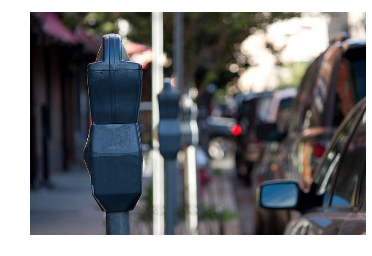

In [7]:
# print(accuracies)
print("\n")
print("Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']))
print("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print("%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print("\n")
print("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
	print("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   #35 is per question percentage accuracy
if len(evals) > 0:
    print('ground truth answers')
    randomEval = random.choice(evals)
    randomAnn = vqa.loadQA(randomEval)
    vqa.showQA(randomAnn)

    print('\n')
    print('generated answer (accuracy %.02f)'%(vqaEval.evalQA[randomEval]))
    ann = vqaRes.loadQA(randomEval)[0]
    print("Answer:   %s\n" %(ann['answer']))

    imgId = randomAnn[0]['image_id']
    imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
    if os.path.isfile(imgDir + imgFilename):
        I = io.imread(imgDir + imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()

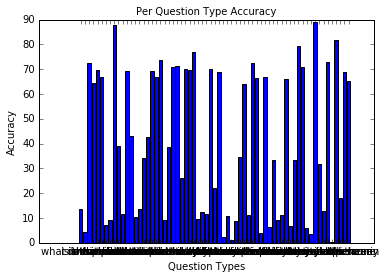

In [172]:
# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))